In [1]:
#!pip install Textblob

In [16]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import display
from textblob import TextBlob # sentiment analysis with TextBlob
import re # regex for cleaning the tweets
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/xander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Read csv file into a pandas dataframe
df = pd.read_csv('FTTH.csv')

In [18]:
# Viewing number of rows and columns in the dataset
df.shape

(4688, 22)

In [19]:
# Viewing the dataset that contains the entire csv file
df

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,Kinyua_Ngugi,Kinyua Ngugi,825938918,1158069844887187457,/Kinyua_Ngugi/status/1158069844887187457,2019-08-04 17:39:01,1564940341,@Safaricom_Care. I have not being able to acce...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
1,1,MullaJames,james mulla,2991661769,1158019548643282944,/MullaJames/status/1158019548643282944,2019-08-04 14:19:10,1564928350,@SafaricomPLC poor customer care ever from Thu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
2,2,VMageka,Vivy :),490216188,1157969000489504768,/VMageka/status/1157969000489504768,2019-08-04 10:58:18,1564916298,@Safaricom_Care Hi my home fibre hasnt been wo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
3,3,sackie84,Isaac,122393420,1157961337118625792,/sackie84/status/1157961337118625792,2019-08-04 10:27:51,1564914471,@Safaricom_Care I activated my fibre home toda...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4,4,KarwithaME,Ka Rwitha,724505742,1157944737149706240,/KarwithaME/status/1157944737149706240,2019-08-04 09:21:53,1564910513,@Safaricom_Care . What charges have you added ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EBHYmbzXkAIoecC....,NaN,0,0,1,True,False,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,4683,riopiyo,Sir Richard Duke of UK (Uyoma Katwenga),84088672,1202270147412660228,/riopiyo/status/1202270147412660228,2019-12-04 16:55:14,1575478514,@Safaricom_Care please send a technician to co...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
4684,4684,KenyanBern,Kenyanbern: Microbiologist,855016101843005440,1202222783310319617,/KenyanBern/status/1202222783310319617,2019-12-04 13:47:02,1575467222,Hi @Safaricom_Care I called 2 days ago request...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4685,4685,JeffMgg,Geoffrey_M,493550243,1202215227934334976,/JeffMgg/status/1202215227934334976,2019-12-04 13:17:01,1575465421,@Safaricom_Care I have been requesting to be c...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EK8gRzHX0AUaAuL....,NaN,0,0,2,True,False,NaN,[]
4686,4686,mikemunyi,DΣXƬΣЯ,18046438,1202187573998829569,/mikemunyi/status/1202187573998829569,2019-12-04 11:27:07,1575458827,@Safaricom_Care Good afternoon guys. Home fibr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]


In [20]:
# Quick look at the first few rows
display(df.head())

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,Kinyua_Ngugi,Kinyua Ngugi,825938918,1158069844887187457,/Kinyua_Ngugi/status/1158069844887187457,2019-08-04 17:39:01,1564940341,@Safaricom_Care. I have not being able to acce...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
1,1,MullaJames,james mulla,2991661769,1158019548643282944,/MullaJames/status/1158019548643282944,2019-08-04 14:19:10,1564928350,@SafaricomPLC poor customer care ever from Thu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
2,2,VMageka,Vivy :),490216188,1157969000489504768,/VMageka/status/1157969000489504768,2019-08-04 10:58:18,1564916298,@Safaricom_Care Hi my home fibre hasnt been wo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
3,3,sackie84,Isaac,122393420,1157961337118625792,/sackie84/status/1157961337118625792,2019-08-04 10:27:51,1564914471,@Safaricom_Care I activated my fibre home toda...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4,4,KarwithaME,Ka Rwitha,724505742,1157944737149706240,/KarwithaME/status/1157944737149706240,2019-08-04 09:21:53,1564910513,@Safaricom_Care . What charges have you added ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EBHYmbzXkAIoecC....,NaN,0,0,1,True,False,NaN,[]


In [21]:
# summarize the dataset
print(df.describe())

        Unnamed: 0       user_id      tweet_id  timestamp_epochs  video_url  \
count  4688.000000  4.688000e+03  4.688000e+03      4.688000e+03        0.0   
mean   2343.500000  1.479866e+17  1.168797e+18      1.567498e+09        NaN   
std    1353.453361  3.471991e+17  5.107434e+16      1.217707e+07        NaN   
min       0.000000  7.674792e+06  1.079923e+18      1.546309e+09        NaN   
25%    1171.750000  2.299376e+08  1.123808e+18      1.556772e+09        NaN   
50%    2343.500000  4.602445e+08  1.170273e+18      1.567850e+09        NaN   
75%    3515.250000  2.499885e+09  1.212768e+18      1.577981e+09        NaN   
max    4687.000000  1.251855e+18  1.254479e+18      1.587926e+09        NaN   

             likes     retweets      replies  parent_tweet_id  
count  4688.000000  4688.000000  4688.000000     7.990000e+02  
mean      1.196886     0.320606     0.963097     1.169289e+18  
std      15.029629     3.390367     1.720657     5.496986e+16  
min       0.000000     0.000000 

In [22]:
# Getting the independent variable (tweets to be analysed). 
# It falls on the 8th index under variable name text
# option 1:
tweets = df.iloc[:, 8].values
df = pd.DataFrame(tweets)

# Option 2:
#df = df[['text']]

In [23]:
# Viewing the df that has the tweets to be analysed
df

,0
0,@Safaricom_Care. I have not being able to acce...
1,@SafaricomPLC poor customer care ever from Thu...
2,@Safaricom_Care Hi my home fibre hasnt been wo...
3,@Safaricom_Care I activated my fibre home toda...
4,@Safaricom_Care . What charges have you added ...
...,...
4683,@Safaricom_Care please send a technician to co...
4684,Hi @Safaricom_Care I called 2 days ago request...
4685,@Safaricom_Care I have been requesting to be c...
4686,@Safaricom_Care Good afternoon guys. Home fibr...


In [24]:
# Looking at the Target variable for missing values
df[0].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4683    False
4684    False
4685    False
4686    False
4687    False
Name: 0, Length: 4688, dtype: bool

In [25]:
# Total missing values for the target variable
df[0].isnull().sum()

0

In [26]:
# Saving the df to a new variable
df_TextBlob = df
df_TextBlob

,0
0,@Safaricom_Care. I have not being able to acce...
1,@SafaricomPLC poor customer care ever from Thu...
2,@Safaricom_Care Hi my home fibre hasnt been wo...
3,@Safaricom_Care I activated my fibre home toda...
4,@Safaricom_Care . What charges have you added ...
...,...
4683,@Safaricom_Care please send a technician to co...
4684,Hi @Safaricom_Care I called 2 days ago request...
4685,@Safaricom_Care I have been requesting to be c...
4686,@Safaricom_Care Good afternoon guys. Home fibr...


In [27]:
# Labelling unlabelled corpus with TextBlob. 

# Getting the Polarity and Subjectivity of the unlabelled Sentiments with TextBlob
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df_TextBlob['polarity'] = df_TextBlob[0].apply(polarity)
df_TextBlob['subjectivity'] = df_TextBlob[0].apply(subjectivity)
df_TextBlob

,0,polarity,subjectivity
0,@Safaricom_Care. I have not being able to acce...,0.016667,0.325000
1,@SafaricomPLC poor customer care ever from Thu...,0.050000,0.550000
2,@Safaricom_Care Hi my home fibre hasnt been wo...,0.000000,0.000000
3,@Safaricom_Care I activated my fibre home toda...,0.000000,0.000000
4,@Safaricom_Care . What charges have you added ...,0.185714,0.242857
...,...,...,...
4683,@Safaricom_Care please send a technician to co...,0.000000,0.000000
4684,Hi @Safaricom_Care I called 2 days ago request...,0.000000,0.000000
4685,@Safaricom_Care I have been requesting to be c...,0.033333,0.133333
4686,@Safaricom_Care Good afternoon guys. Home fibr...,0.272222,0.444444


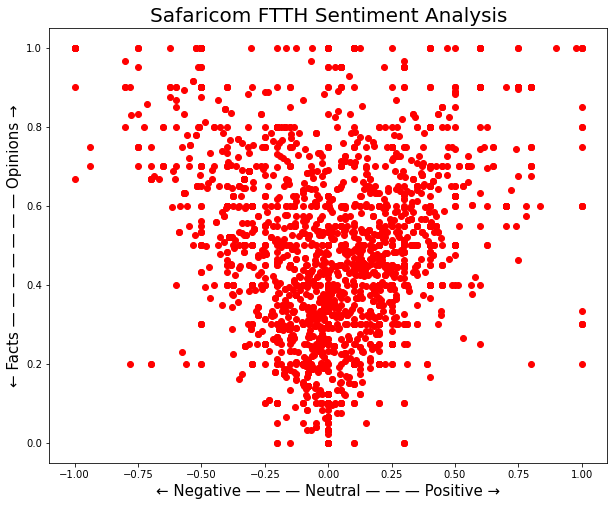

In [28]:
# Plotting the TextBlob results

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df_TextBlob.polarity.loc[Tweets]
 y = df_TextBlob.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Safaricom FTTH Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — Neutral — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [29]:
# Function to calculate positive, negative and neutral sentiments.
# if polarity: greater than 1 --> Positive, equal to 0 --> neutral & less than 0 --> Negative
# new polarities saved in new variable "analysis"
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df_TextBlob['analysis'] = df_TextBlob['polarity'].apply(ratio)
df_TextBlob

,0,polarity,subjectivity,analysis
0,@Safaricom_Care. I have not being able to acce...,0.016667,0.325000,1
1,@SafaricomPLC poor customer care ever from Thu...,0.050000,0.550000,1
2,@Safaricom_Care Hi my home fibre hasnt been wo...,0.000000,0.000000,0
3,@Safaricom_Care I activated my fibre home toda...,0.000000,0.000000,0
4,@Safaricom_Care . What charges have you added ...,0.185714,0.242857,1
...,...,...,...,...
4683,@Safaricom_Care please send a technician to co...,0.000000,0.000000,0
4684,Hi @Safaricom_Care I called 2 days ago request...,0.000000,0.000000,0
4685,@Safaricom_Care I have been requesting to be c...,0.033333,0.133333,1
4686,@Safaricom_Care Good afternoon guys. Home fibr...,0.272222,0.444444,1


In [30]:
# Getting the total count of the polarities
df_TextBlob['analysis'].value_counts()

 0    1890
 1    1452
-1    1346
Name: analysis, dtype: int64

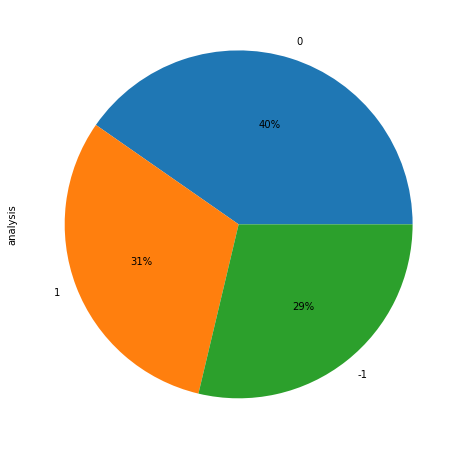

In [31]:
# Plotting the TexBlob results with a pie chart
df_TextBlob['analysis'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.show()

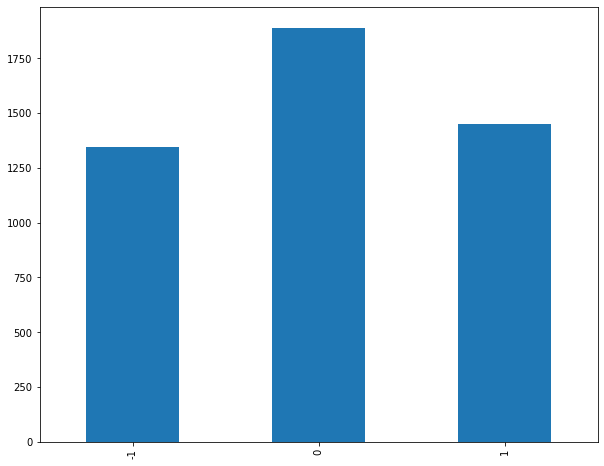

In [33]:
# Plotting the TexBlob results with a different kind of chart: bar chart
df_TextBlob['analysis'].value_counts().sort_index().plot.bar()
plt.show()

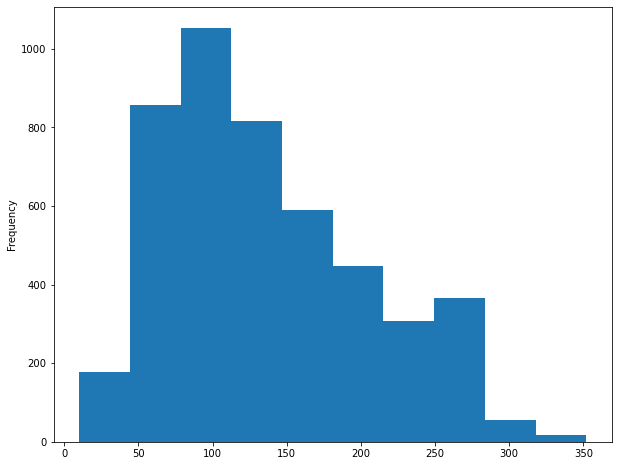

In [34]:
# Visualizing the length of the text
df_TextBlob[0].str.len().plot.hist()

In [37]:
# Data Pre-processing
# Removing the company's twitter handles as they do not add any value
df_TextBlob[0] = df_TextBlob[0].str.replace('@Safaricom_Care','')
df_TextBlob[0] = df_TextBlob[0].str.replace('@SafaricomPLC','')
df_TextBlob

,0,polarity,subjectivity,analysis
0,. I have not being able to access home fibre f...,0.016667,0.325000,1
1,poor customer care ever from Thursday i gave ...,0.050000,0.550000,1
2,Hi my home fibre hasnt been working since yes...,0.000000,0.000000,0
3,I activated my fibre home today. When I check...,0.000000,0.000000,0
4,. What charges have you added to your home ne...,0.185714,0.242857,1
...,...,...,...,...
4683,please send a technician to come repair our h...,0.000000,0.000000,0
4684,Hi I called 2 days ago requesting for Home fi...,0.000000,0.000000,0
4685,I have been requesting to be connected since ...,0.033333,0.133333,1
4686,Good afternoon guys. Home fibre account 11159...,0.272222,0.444444,1


In [38]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions

corpus = []

def clean(x):
    x = re.sub(r'^RT[\s]+', '', x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'#', '', x)
    x = re.sub(r'@[A-Za-z0–9]+', '', x)
    x = x.lower() # text transform. Changing all uppercase letters to lowercase letters.
    x = x.split() # splitting each tweet sentiment into its individual words before stemming.
    ps = PorterStemmer() # calling the stemming function and assigning it to a variable 'ps'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    all_stopwords.remove('don')
    all_stopwords.remove("don't")
    all_stopwords.remove('aren')
    all_stopwords.remove("aren't")
    all_stopwords.remove('couldn')
    all_stopwords.remove("couldn't")
    all_stopwords.remove('didn')
    all_stopwords.remove("didn't")
    all_stopwords.remove("doesn't")
    all_stopwords.remove('doesn')
    all_stopwords.remove('hadn')
    all_stopwords.remove("hadn't")
    all_stopwords.remove('hasn')
    all_stopwords.remove("hasn't")
    all_stopwords.remove('haven')
    all_stopwords.remove("haven't")
    all_stopwords.remove('isn')
    all_stopwords.remove("isn't")
    all_stopwords.remove('mightn')
    all_stopwords.remove("mightn't")
    all_stopwords.remove('mustn')
    all_stopwords.remove("mustn't")
    all_stopwords.remove('needn')
    all_stopwords.remove("needn't")
    all_stopwords.remove("shan't")
    all_stopwords.remove('shouldn')
    all_stopwords.remove("shouldn't")
    all_stopwords.remove("wasn't")
    all_stopwords.remove("weren't")
    all_stopwords.remove("won't")
    all_stopwords.remove("wouldn't")
    x = [ps.stem(word) for word in x if not word in set(all_stopwords)] # removing all stopwords then stemming all other words.
    x = ' '.join(x) # combining all split words to form the original format of the tweet. 
    corpus.append(x)
    
    return x
df_TextBlob[0] = df_TextBlob[0].apply(clean)

In [39]:
# Checking the new cleaned df
df_TextBlob

,0,polarity,subjectivity,analysis
0,. not abl access home fibr past hour,0.016667,0.325000,1
1,poor custom care ever thursday gave,0.050000,0.550000,1
2,hi home fibr hasnt work sinc yesterday morn ac...,0.000000,0.000000,0
3,activ fibr home today. check find balanc 0. pl...,0.000000,0.000000,0
4,. charg ad home net? secur net? 200 for? fibr ...,0.185714,0.242857,1
...,...,...,...,...
4683,pleas send technician come repair home fibr co...,0.000000,0.000000,0
4684,"hi call 2 day ago request home fibr connect , ...",0.000000,0.000000,0
4685,request connect sinc may vain. apart next us l...,0.033333,0.133333,1
4686,good afternoon guys. home fibr account 1115904...,0.272222,0.444444,1


In [45]:
# Representing Text in Numeric Form
# Creating the Bag of Words Model for TextBlob
# Bag of words takes the most frequent words used and leaves the rest.
# These frequent words are stored in the sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6660) # matrix of features
X = cv.fit_transform(corpus).toarray() # fit gets all words & transform stores the words in a column
y = df_TextBlob.iloc[:,-1].values

In [46]:
len(X[0]) # gives the number of elements in the first row as a result of tokenization

6660

In [47]:
# Splitting the dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [48]:
# Model training 1: Naive Bayes

# Training the Naive Bayes Model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [49]:
# Predicting the Test Result Test
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1  1]
 [ 1 -1]
 [-1  1]
 ...
 [-1  0]
 [ 1  1]
 [-1 -1]]


In [50]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(cm)

# Niave Bayes accuracy
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.42      0.84      0.56       432
           0       0.70      0.30      0.42       544
           1       0.67      0.47      0.55       431

    accuracy                           0.52      1407
   macro avg       0.60      0.54      0.51      1407
weighted avg       0.61      0.52      0.50      1407

[[364  20  48]
 [330 164  50]
 [179  50 202]]


0.5188343994314144

In [51]:
# Model Training 2: SVM
# The fit method of SVC class is called to train the algorithm on the training data which is passed as a parameter to the fit method.

from sklearn.svm import SVC
# svclassifier = SVC(kernel='poly', degree=8) # polynomial kernel accuracy: 0.43%
# svclassifier = SVC(kernel='rbf')  # Gaussian Kernel accuracy is: 0.74%
svclassifier = SVC(kernel='sigmoid') # Sigmoid Kernel: accuracy is: 0.72%
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [52]:
# Making Predictions
y_pred = svclassifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1  1]
 [ 0 -1]
 [ 1  1]
 ...
 [ 0  0]
 [ 1  1]
 [ 0 -1]]


In [53]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(cm)

# SVM accuracy
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.75      0.58      0.65       432
           0       0.67      0.92      0.77       544
           1       0.80      0.61      0.69       431

    accuracy                           0.72      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.73      0.72      0.71      1407

[[249 141  42]
 [ 23 499  22]
 [ 59 109 263]]


0.7185501066098081

In [54]:
# Model Training 3: Random Forest
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [55]:
# Making Predictions
predictions = text_classifier.predict(X_test)

In [56]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[291 105  36]
 [ 18 510  16]
 [ 33  87 311]]
              precision    recall  f1-score   support

          -1       0.85      0.67      0.75       432
           0       0.73      0.94      0.82       544
           1       0.86      0.72      0.78       431

    accuracy                           0.79      1407
   macro avg       0.81      0.78      0.78      1407
weighted avg       0.80      0.79      0.79      1407

0.7903340440653873


In [61]:
# Model Training 4: Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [62]:
# Making Predictions
y_pred = LR.predict(X_test)

In [63]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[283 109  40]
 [ 19 496  29]
 [ 46  75 310]]
              precision    recall  f1-score   support

          -1       0.81      0.66      0.73       432
           0       0.73      0.91      0.81       544
           1       0.82      0.72      0.77       431

    accuracy                           0.77      1407
   macro avg       0.79      0.76      0.77      1407
weighted avg       0.78      0.77      0.77      1407

0.7739872068230277


In [77]:
# Model Training 5: Neural Network
from sklearn.neural_network import MLPClassifier

# solver='adam' - (68%) - max_iter = 1000
# solver='lbfgs' - 68.8% - max_iter = 1000
# solver='sgd' - (65.8%) - max_iter = 10000
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 10000, random_state=1)
NN.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

In [78]:
# Making Predictions
y_pred = NN.predict(X_test)

In [79]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[296  81  55]
 [162 327  55]
 [ 34  52 345]]
              precision    recall  f1-score   support

          -1       0.60      0.69      0.64       432
           0       0.71      0.60      0.65       544
           1       0.76      0.80      0.78       431

    accuracy                           0.69      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.69      0.69      0.69      1407

0.6879886282871357
